## Q&A Activity Question Week -15

#### Activity Description

Jio fibre wants to implement AI/ML in their systems. The activity task
is to build a network intrusion detector, a predictive model capable of
distinguishing between ``bad&#39;&#39; connections, called
intrusions or attacks, and ``good&#39;&#39; normal connections.
This database contains a standard set of data to be audited, which
includes a wide variety of intrusions in the network environment. Your
target is building a machine efficient learning model using
probabilistic approach models, probabilities of bad or good
connections using naïve bayes model. This is a multi-class
classification. Fine tune the model and make a model which has at
least 97 percent accuracy

### 1) Loading And Understanding the Dataset

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('tcp-connection (1).csv')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,b'udp',b'domain_u',b'SF',44,134,0,0,0,0,...,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'smtp',b'SF',1489,385,0,0,0,0,...,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
3,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
4,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,b'neptune.'


In [3]:
df.shape

(494021, 42)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [5]:
print(df['intrusion'].unique()) # target feature
print('-'*30)
print(df['intrusion'].value_counts())

["b'normal.'" "b'smurf.'" "b'neptune.'" "b'warezclient.'" "b'satan.'"
 "b'back.'" "b'ipsweep.'" "b'portsweep.'" "b'teardrop.'"
 "b'guess_passwd.'" "b'nmap.'" "b'imap.'" "b'pod.'" "b'phf.'"
 "b'loadmodule.'" "b'buffer_overflow.'" "b'warezmaster.'" "b'land.'"
 "b'rootkit.'" "b'perl.'" "b'multihop.'" "b'ftp_write.'" "b'spy.'"]
------------------------------
b'smurf.'              280790
b'neptune.'            107201
b'normal.'              97278
b'back.'                 2203
b'satan.'                1589
b'ipsweep.'              1247
b'portsweep.'            1040
b'warezclient.'          1020
b'teardrop.'              979
b'pod.'                   264
b'nmap.'                  231
b'guess_passwd.'           53
b'buffer_overflow.'        30
b'land.'                   21
b'warezmaster.'            20
b'imap.'                   12
b'rootkit.'                10
b'loadmodule.'              9
b'ftp_write.'               8
b'multihop.'                7
b'phf.'                     4
b'perl.'     

In [6]:
# to check the missing value
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serrer_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

There is no null values present in data

In [7]:
df.nunique()

duration                        2495
protocol_type                      3
service                           66
flag                              11
src_bytes                       3300
dst_bytes                      10725
land                               2
wrong_fragment                     3
urgent                             4
hot                               22
num_failed_logins                  6
logged_in                          2
num_compromised                   23
root_shell                         2
su_attempted                       3
num_root                          20
num_file_creations                18
num_shells                         3
num_access_files                   7
num_outbound_cmds                  1
is_host_login                      1
is_guest_login                     2
count                            490
srv_count                        470
serror_rate                       92
srv_serrer_rate                   51
rerror_rate                       77
s

### 3) Data Preprocessing

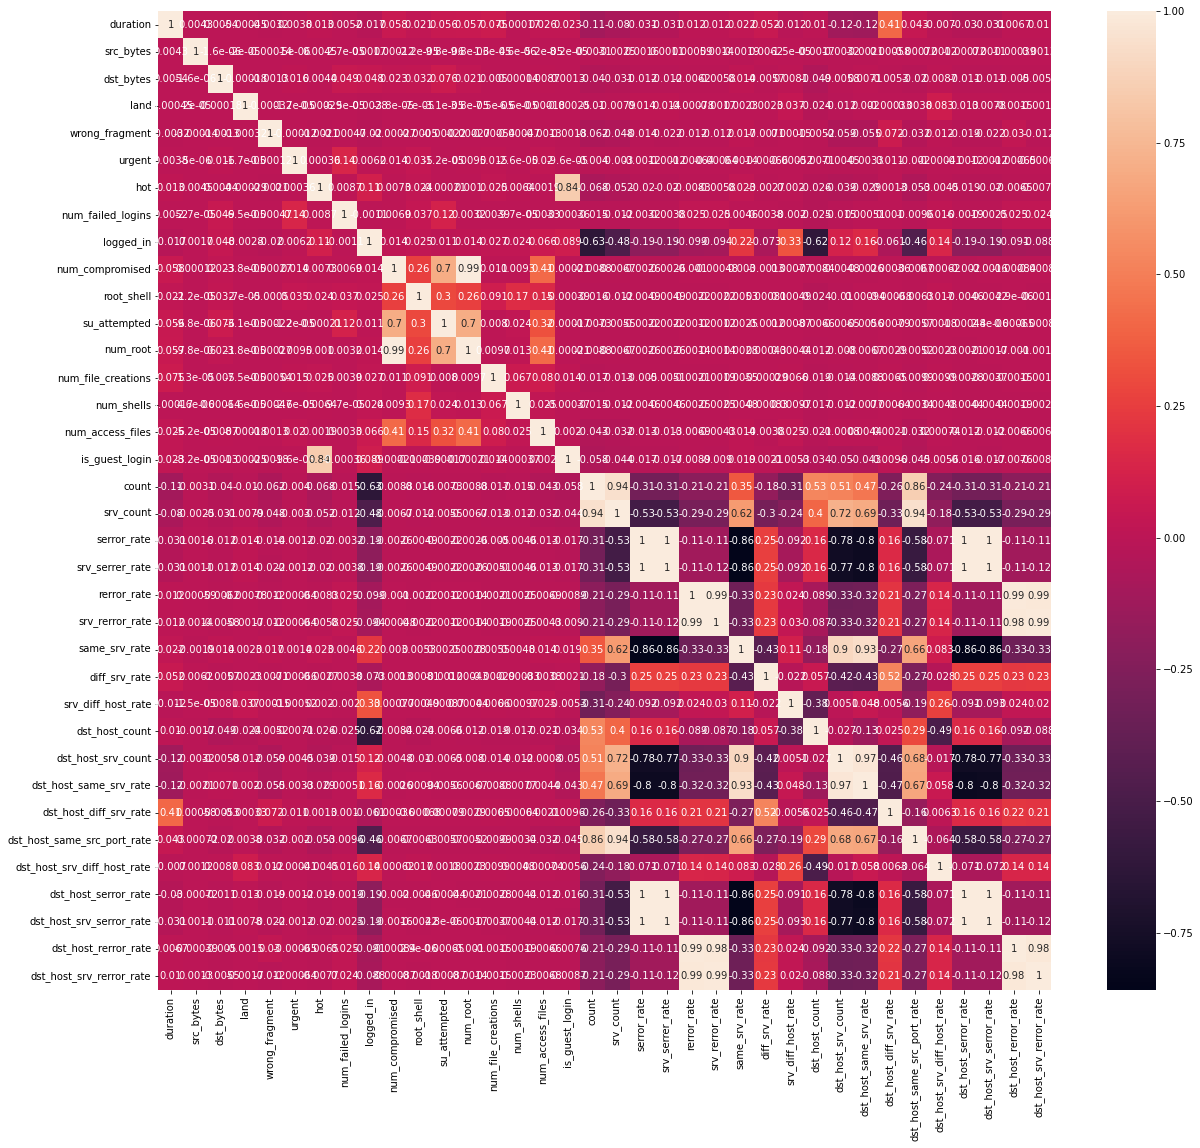

In [8]:
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize =(20, 18))

sns.heatmap(corr,annot = True)

plt.show()



In [9]:
# The variable is highly correlated with num_compromised and should be ignored for analysis.

df.drop(['num_root','srv_rerror_rate','dst_host_srv_serror_rate','dst_host_serror_rate',
        'dst_host_rerror_rate','dst_host_srv_rerror_rate','dst_host_same_srv_rate',], axis = 1, inplace = True)

In [10]:
# Separate the data into feature data and target data (X and y, respectively)
X=df.drop(['intrusion'],axis=1)
y=pd.DataFrame(df['intrusion'])

In [11]:
from sklearn.preprocessing import LabelEncoder
X = X.apply(LabelEncoder().fit_transform)
X.head() 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,srv_serrer_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0,2,11,9,38,115,0,0,0,0,...,0,0,98,0,1,139,89,1,1,0
1,0,1,50,9,1445,364,0,0,0,0,...,0,0,98,0,63,5,116,0,20,2
2,0,0,14,9,988,0,0,0,0,0,...,0,0,98,0,0,255,255,0,100,0
3,0,0,14,9,988,0,0,0,0,0,...,0,0,98,0,0,255,255,0,100,0
4,0,1,45,5,0,0,0,0,0,0,...,50,0,3,7,0,255,6,7,0,0


In [12]:
y = y.apply(LabelEncoder().fit_transform)
y.head()

,intrusion
0,11
1,11
2,18
3,18
4,9


In [13]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
#min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

## Naïve Bayes’ Classifier

In [15]:
#fitting gaussian naive bayes to the training set
from sklearn.naive_bayes import GaussianNB
classifier1=GaussianNB()
classifier1.fit(X_train,y_train)
y_pred=classifier1.predict(X_test)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.9324891098408175


In [16]:
#confusion metrix
confusion_matrix(y_test,y_pred)

array([[  539,     1,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     6,     0,     0,     0,     0,     0,     0,
            0,     0,     1,     0],
       [    0,     5,     0,     0,     0,     0,     0,     1,     0,
            0,     0,     1,     0,     0,     0,     0,     0,     0,
            0,     0,     2,     3],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0],
       [    0,     0,     0,    11,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0],
       [    0,     0,     0,     0,     3,     0,     0,     0,     0,
            0,     0,     2,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,   287,    20,     0

In [17]:
#fitting bernoulli naive bayes to the training set
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.9315660777614043


In [18]:
#fitting multinomial naive bayes to the training set
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.9875957443363076


In [19]:
print('Accuracy is: {}%'.format(round(accuracy_score(y_test,y_pred)*100,2)))
print('-'*40)

Accuracy is: 98.76%
----------------------------------------


### Multinomial naive bayes model is the best fit model beacause it has accuracy equal to 98.76%